In [25]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoConfig

model_ckpt = "bert-base-uncased"
sentence = "time files like an arrow"


tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
inputs = tokenizer(sentence, return_tensors='pt', add_special_tokens=False)
x = inputs.input_ids
x

tensor([[2051, 6764, 2066, 2019, 8612]])

In [26]:
config = AutoConfig.from_pretrained(model_ckpt)
embedding = nn.Embedding(config.vocab_size, config.hidden_size)
x = embedding(x)
x.shape

torch.Size([1, 5, 768])

In [30]:
q = k = v = x

In [36]:
k.size(-1)

768

In [44]:
import math

scores = (q @ k.transpose(1,2)) / math.sqrt(k.size(-1))
scores

tensor([[[27.3534,  0.1775, -0.3274, -0.2986,  0.4045],
         [ 0.1775, 26.5437,  0.6858, -0.5510, -1.6550],
         [-0.3274,  0.6858, 27.2804,  1.5167, -0.2225],
         [-0.2986, -0.5510,  1.5167, 27.7590,  1.3069],
         [ 0.4045, -1.6550, -0.2225,  1.3069, 27.3051]]],
       grad_fn=<DivBackward0>)

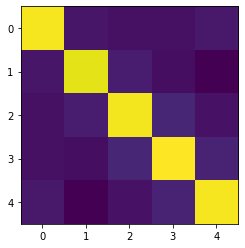

In [47]:
import matplotlib.pyplot as plt
plt.imshow(scores[0].detach())

In [85]:
import torch.nn.functional as F
F.softmax(scores, dim=-1)

tensor([[[1.0000e+00, 1.5764e-12, 9.5151e-13, 9.7928e-13, 1.9782e-12],
         [3.5426e-12, 1.0000e+00, 5.8894e-12, 1.7098e-12, 5.6684e-13],
         [1.0235e-12, 2.8190e-12, 1.0000e+00, 6.4708e-12, 1.1367e-12],
         [6.5275e-13, 5.0716e-13, 4.0099e-12, 1.0000e+00, 3.2509e-12],
         [2.0761e-12, 2.6472e-13, 1.1090e-12, 5.1184e-12, 1.0000e+00]]],
       grad_fn=<SoftmaxBackward0>)

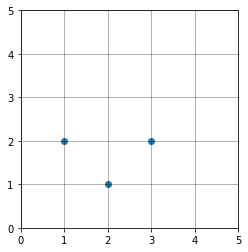

In [68]:
x = torch.FloatTensor([[2, 1],
                       [3, 2],
                       [1, 2],])

plt.scatter(*x.T)
plt.axis('square')
plt.xlim(0,5)
plt.ylim(0,5)
for i in range(10):
    plt.axvline(i, c='k', alpha=.3, lw=1)
    plt.axhline(i, c='k', alpha=.3, lw=1)

tensor([[3.5355, 5.6569, 2.8284],
        [5.6569, 9.1924, 4.9497],
        [2.8284, 4.9497, 3.5355]])